In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_df = yf.download('NVDA', start='2023-01-01', end='2024-01-01',  interval='1h')
stock_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,148.509995,149.960007,143.070007,143.520004,143.520004,11605646
2023-01-03 10:30:00-05:00,143.529999,143.570007,141.030106,141.960007,141.960007,7234854
2023-01-03 11:30:00-05:00,141.949997,142.610001,140.960007,141.830093,141.830093,4647010
2023-01-03 12:30:00-05:00,141.850006,142.860001,141.570007,142.789993,142.789993,3367135
2023-01-03 13:30:00-05:00,142.800095,142.863098,142.029999,142.271698,142.271698,3274138


In [3]:
index_df = yf.download('QQQM', start='2023-01-01', end='2024-01-01',  interval='1h')
index_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,110.500000,111.110001,108.660004,108.704002,108.704002,165293
2023-01-03 10:30:00-05:00,108.730003,109.190002,108.320000,108.320000,108.320000,68202
2023-01-03 11:30:00-05:00,108.510002,108.510002,107.959999,108.110001,108.110001,82331
2023-01-03 12:30:00-05:00,108.121597,108.429001,107.849998,108.379997,108.379997,33145
2023-01-03 13:30:00-05:00,108.360001,108.564102,108.220001,108.410004,108.410004,129229


In [4]:
def convert_to_daily(data):
  output = pd.DataFrame()
  data.reset_index(inplace = True, drop = False)
  for i in range (0, int(len(data)/7)):
    # Assuming a trading day to last 7 hourly candles.
    output.loc[i, 'Open'] = data.loc[i*7, 'Open']
    output.loc[i, 'Close'] = data.loc[i*7+6, 'Close']
    output.loc[i, 'High'] = data['High'].iloc[i*7:i*7+7].max()
    output.loc[i, 'Low'] = data['Low'].iloc[i*7:i*7+7].min()
    output.loc[i, 'Volume'] = int(data['Volume'].iloc[i*7:i*7+7].sum())
  output['Daily Return'] = (output['Close'] - output['Close'].shift(1))*100/output['Close'].shift(1)
  for t in range (0, len(output)):
    output.loc[t, 'Cumulative Return'] = output['Daily Return'].iloc[0:t+1].sum()
  return output

In [5]:
index_daily = convert_to_daily(index_df)
stock_daily = convert_to_daily(stock_df)
print(f"The cummulative return of NASDAQ Index is: {index_daily['Daily Return'].sum()}%")
print(f"The cummulative return of NVIDIA Stock is: {stock_daily['Daily Return'].sum()}%")

The cummulative return of NASDAQ Index is: 45.77430135448107%
The cummulative return of NVIDIA Stock is: 136.13363418200316%


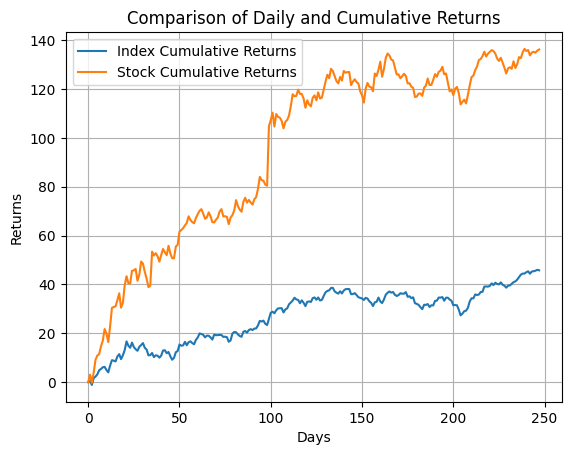

In [6]:
#plt.plot(index_daily.index, index_daily['Daily Return'], label='Index Daily Returns')
#plt.plot(stock_daily.index, stock_daily['Daily Return'], label='Stock Daily Returns')
plt.plot(index_daily.index, index_daily['Cumulative Return'], label='Index Cumulative Returns')
plt.plot(stock_daily.index, stock_daily['Cumulative Return'], label='Stock Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.title('Comparison of Daily and Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()